## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Drop duplicate timepoints for the same Mouse ID
data_clean = data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Display the data table for preview
data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Checking the number of mice.

numberMice = len(data_clean['Mouse ID'].unique())
print(numberMice)

249


In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## I cleaned the data above, but realize looking at the dropped data is a good idea,
## so will do that here.

# Create copy of OG data
duplicate_data = data_complete
# Add a column that marks duplicate timestamps for a Mouse ID, mark all duplicate values as true so we can see if we need to keep first or last
duplicate_data['Duplicate'] = data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [39]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data.loc[(duplicate_data['Duplicate'] == True), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

## Did this above, will keep the first of each duplicate entry, as both entries look like accurate
## enough measurements and shouldn't skew results. Wanted to be sure the duplicates weren't
## buggy data.

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Get stats for each regimen
regMean = data_clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
regMedian = data_clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
regVariance = data_clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
regStd = data_clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
regSem = data_clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Combine stats into one table
summaryTable = pd.DataFrame({
    "Mean": regMean,
    "Median": regMedian,
    "Variance": regVariance,
    "STD": regStd,
    "SEM": regSem
})
summaryTable

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggSummaryTable = data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggSummaryTable

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


(0.0, 260.0)

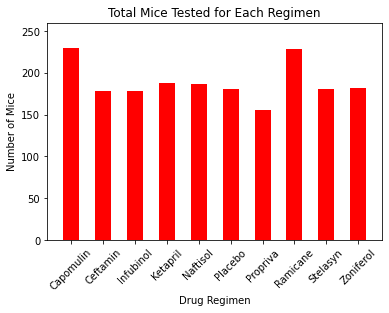

In [76]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

regNumMice = data_clean.groupby('Drug Regimen').count()['Mouse ID']
print(regNumMice)
miceGraph = regNumMice.plot(kind="bar", title='Total Mice Tested for Each Regimen', color='red', rot=45)
miceGraph.set_ylabel('Number of Mice')
miceGraph.set_xlim(-0.75, len(regNumMice) - 0.25)
miceGraph.set_ylim(0, max(regNumMice) + 30)

In [77]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen 
# using pyplot.

regimenList = (data_clean.groupby('Drug Regimen').count()['Mouse ID']).tolist()
regimenList

# plt.bar()
# plt.show()

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
